## Necessary libraries

In [1]:
import os
import matplotlib.pyplot as plt
import sys
import numpy as np
import cv2
import cc3d

from collections import Counter

In [2]:
WORK_DIR = '.'

# If you don't work on Jupyter, just comment below lines
WORK_DIR = '../'
sys.path.append('..')

In [3]:
from utils import data
from config import cfg

## Example image

In [4]:
EXAMPLE_IMAGE_FLAIR = data.load_itk(os.path.join(WORK_DIR, cfg.routes['data_dir'], 'AR-1', 'ax CUBE flair ar-1_2.mhd'))
EXAMPLE_IMAGE_T1 = data.load_itk(os.path.join(WORK_DIR, cfg.routes['data_dir'], 'AR-1', 'AX T1 3D ar-1.mhd'))

In [5]:
print('Flair image size:', EXAMPLE_IMAGE_FLAIR[0].shape)
print('T1 image size:', EXAMPLE_IMAGE_T1[0].shape)

Flair image size: (512, 512, 252)
T1 image size: (320, 256, 256)


## Morphological operations

FLAIR

In [6]:
# EXAMPLE_IMAGE_FLAIR = data.load_itk(os.path.join(WORK_DIR, cfg.routes['data_dir'], 'AR-2', 'AX FLAIR AR 2.mhd'))

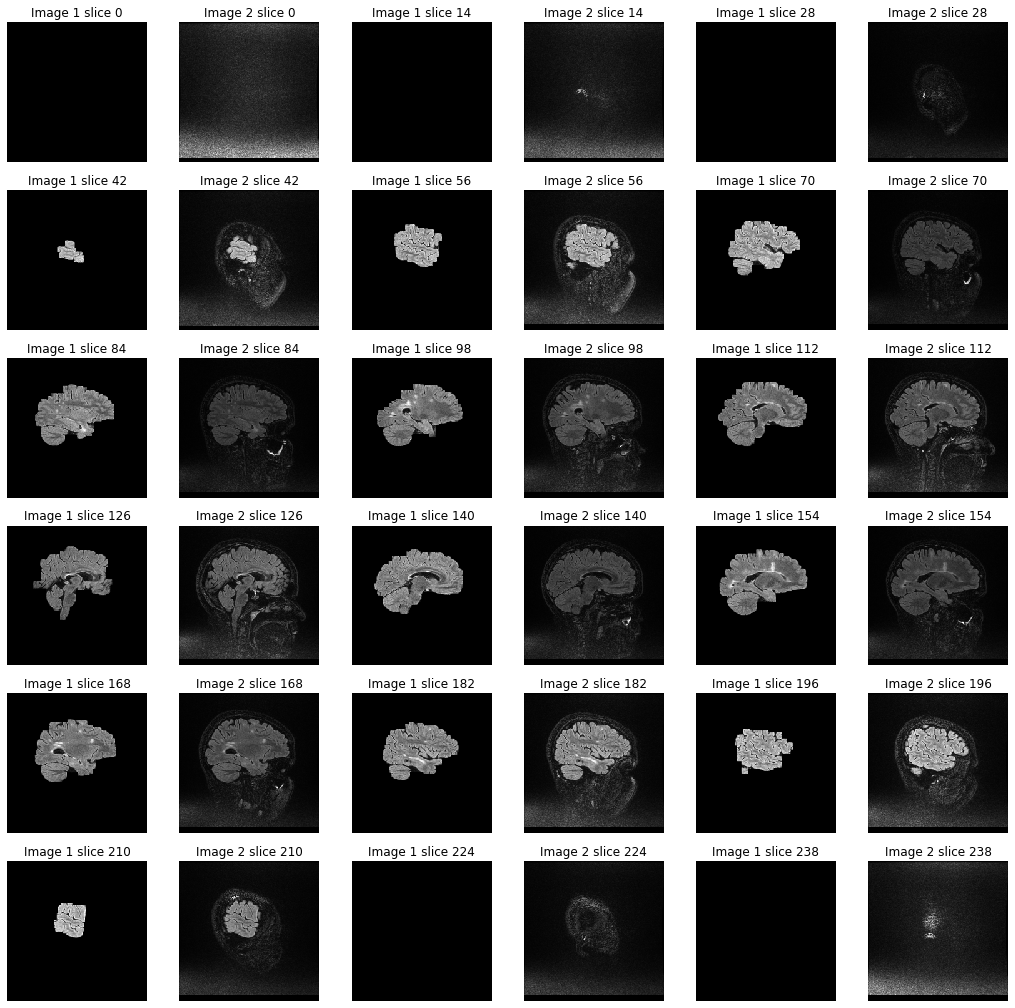

In [7]:
init_image = EXAMPLE_IMAGE_FLAIR[0]
segm_image = init_image
kernel = np.ones((5,5),np.uint8)

# image = cv2.morphologyEx(image, cv2.MORPH_DILATE, kernel, iterations=2)
segm_image = cv2.morphologyEx(segm_image, cv2.MORPH_ERODE, kernel, iterations=5)

thr, segm_image = cv2.threshold(segm_image, 127, 255, cv2.THRESH_BINARY)
segm_image= cc3d.connected_components(segm_image.astype('uint8'), connectivity=26)

i_max = Counter(segm_image.flat).most_common(2)[1][0]
segm_image = segm_image * (segm_image == i_max)
segm_image = cv2.morphologyEx(segm_image.astype('float'), cv2.MORPH_DILATE, kernel, iterations=15)
segm_image = cv2.morphologyEx(segm_image, cv2.MORPH_ERODE, kernel, iterations=10)

data.show_slices_from2images(init_image * (segm_image != 0), init_image, plt=plt, plane='sagittal')

## Extractor
[Brain image processing tools using Deep Learning focused on speed and accuracy.](https://github.com/iitzco/deepbrain)

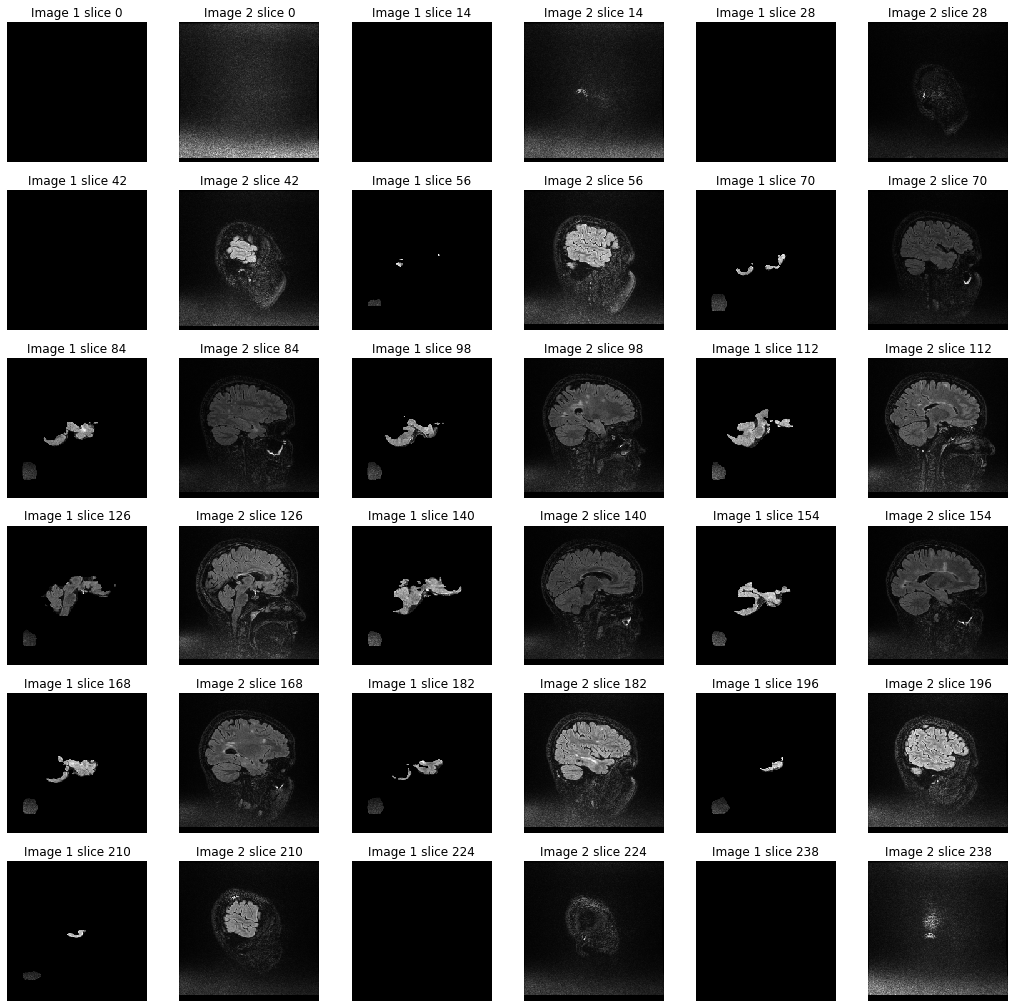

In [10]:
from deepbrain import Extractor

init_image = EXAMPLE_IMAGE_FLAIR[0]
ext = Extractor()

# `prob` will be a 3d numpy image containing probability 
# of being brain tissue for each of the voxels in `img`
prob = ext.run(init_image) 

# mask can be obtained as:
mask = prob > 0.5
data.show_slices_from2images(init_image * (mask.astype('float') != 0), init_image, plt=plt, plane='sagittal')